In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
'''
Get data from text file.
'''
dfHousingData = pd.read_csv('ex1data2.txt', names =['Size','Bedrooms','Price'])
dfFeatures = dfHousingData[['Size','Bedrooms']]
dfTarget = dfHousingData['Price']
dfHousingData.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
'''
Get average and standard deviation of feature columns so the data can be scaled.
'''
avgFeatures = np.matrix(dfFeatures.mean())
stdFeatures = np.matrix(dfFeatures.std())
dfScaledFeatures = (dfFeatures - dfFeatures.mean())/dfFeatures.std()

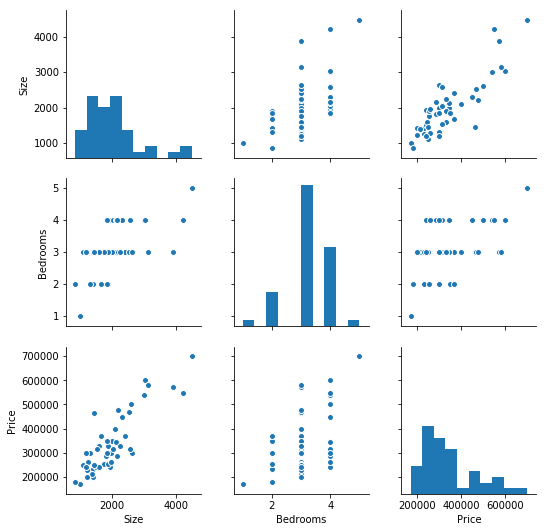

In [4]:
'''
Explore relationship across dataset.  There seems to be a correlation with Size and Price.
'''
sns.pairplot(dfHousingData)

In [5]:
def addBiasColumn(X):
    # Add a ones column for the bias terms.
    intNumSamples = X.shape[0]
    onesColumn = np.ones(shape = (intNumSamples,1))
    newX = np.concatenate([onesColumn,X],axis =1)
    return newX

In [6]:
'''
Convert dataframes to matrices so that we can use numpy.
'''
scaledX = np.matrix(dfScaledFeatures)
X =np.matrix(dfFeatures)
y = np.matrix(dfTarget).T
'''
Add ones column for bias terms.
'''
scaledX = addBiasColumn(scaledX)
X = addBiasColumn(X)
'''
Initialize theta.
'''
theta = np.matrix(np.zeros((X.shape[1],1)))

In [7]:
class LinearRegression:
    def __init__(self):
        pass
    def computeCost(self,X,y,theta,lambdafactor=0):
        intNumSamples = y.shape[0]
        hypothesis = np.dot(X,theta)
        #   Unregularized cost function.
        J = np.sum(np.square(hypothesis -y))/2/intNumSamples
        '''
        #   Regularization term.  Don't square theta0.
        R = lambdafactor*np.sum(np.square(theta[1:,0]))

        #   Regularized cost function.
        J += R
        '''
        return J
    def gradientDescent(self,X,y,theta,learningRate = 0.01,intIterations = 100):
        intNumSamples,intNumFeatures = X.shape
        tempTheta = np.copy(theta)
        costHistory = np.zeros((intIterations,1))

        for i in range(0,intIterations):
            error = np.dot(X,theta) - y
            tempTheta = theta - np.dot(X.T,error)*learningRate/intNumSamples
            theta = np.copy(tempTheta)
            costHistory[i,0] = self.computeCost(X,y,theta)
        self.theta = theta
        self.costHistory = costHistory
        #return theta, costHistory
    def normEqn(self,X,y,regularized = False, lambdafactor = 0):
        if regularized:
            regIdentity = lambdafactor * np.eye(X.shape[1])
            regIdentity[0,0] = 0
            self.theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) - regIdentity),X.T),y)
        else:
            self.theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
        #return calculatedTheta

In [8]:
intIterations = 50
learningRate = 0.3
lm = LinearRegression()
lm.gradientDescent(scaledX,y,theta,learningRate,intIterations)
calcTheta = lm.theta
print(lm.theta)

[[340412.65345227]
 [110572.96193087]
 [ -6591.38592285]]


Text(0,0.5,'Cost Function J')

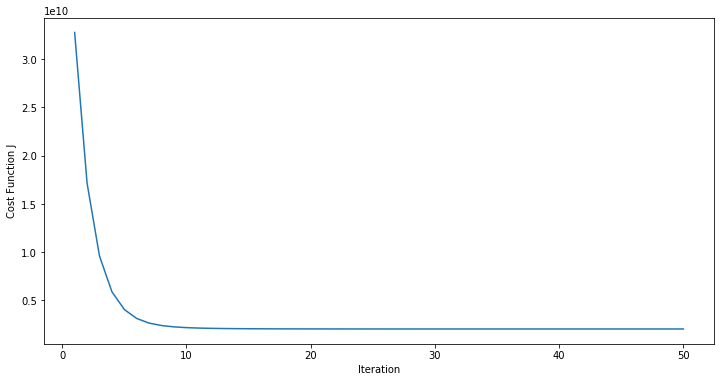

In [9]:
'''
Plot cost function history to see if it minimizes properly.
'''
xValues = np.arange(1,intIterations+1)
fig, axes = plt.subplots(figsize =(12,6))
axes.plot(xValues,lm.costHistory)
axes.set_xlabel('Iteration')
axes.set_ylabel('Cost Function J')

In [10]:
parameters = np.matrix(np.array([1,1650,3], dtype = 'f'))
scaledParameters = np.copy(parameters)
for i in range(1,scaledParameters.shape[1]):
    scaledParameters[0,i] = (parameters[0,i]-avgFeatures[0,i-1])/stdFeatures[0,i-1]
estimatedPrice = np.dot(scaledParameters,calcTheta)

print('Estimated price for 1650 sq-ft, 3 br house:')
print('via gradient descent: %s' %estimatedPrice)

lm.normEqn(X,y)
estimatedPrice = np.dot(parameters,lm.theta)
print('via normal equation: %s' %estimatedPrice)

Estimated price for 1650 sq-ft, 3 br house:
via gradient descent: [[293094.09684071]]
via normal equation: [[293081.46433489]]


In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(dfScaledFeatures,dfTarget)

calcTheta = []
calcTheta.append(lm.intercept_)

for item in lm.coef_:
    calcTheta.append(item)
estimatedPrice = np.dot(scaledParameters,calcTheta)
print(calcTheta)
print('Estimated price using sklearn: %s' %estimatedPrice)


[340412.6595744681, 110631.0502788461, -6649.474270819794]
Estimated price using sklearn: [293081.46305335]
